<div class="alert alert-block alert-success">
    <b>ARTIFICIAL INTELLIGENCE (E016350A)</b> <br>
ALEKSANDRA PIZURICA <br>
GHENT UNIVERSITY <br>
AY 2024/2025 <br>
Assistant: Nicolas Vercheval
</div>

# Linear regression

A linear regression model predicts the output variable (target variable) $y$ by fitting a linear equation to observed data $x_1, x_2, ..., x_d$:$$y = w_0 + w_1x_1 + w_2x_2 + \ldots + w_dx_d$$ 

The task is to find the coefficients $w_0, w_1,..., w_d$ such that this linear model best fits the data. In this model, the elements of the input vector $x_1, x_2, ..., x_d$ are also called the input attributes, and they constitute independent variables, while the target variable $y$ is the dependent variable. In statistics, the input vector $\textbf{x}$ is also called the vector of regressors or explanatory variables and $y$ is also referred to as the response variable.

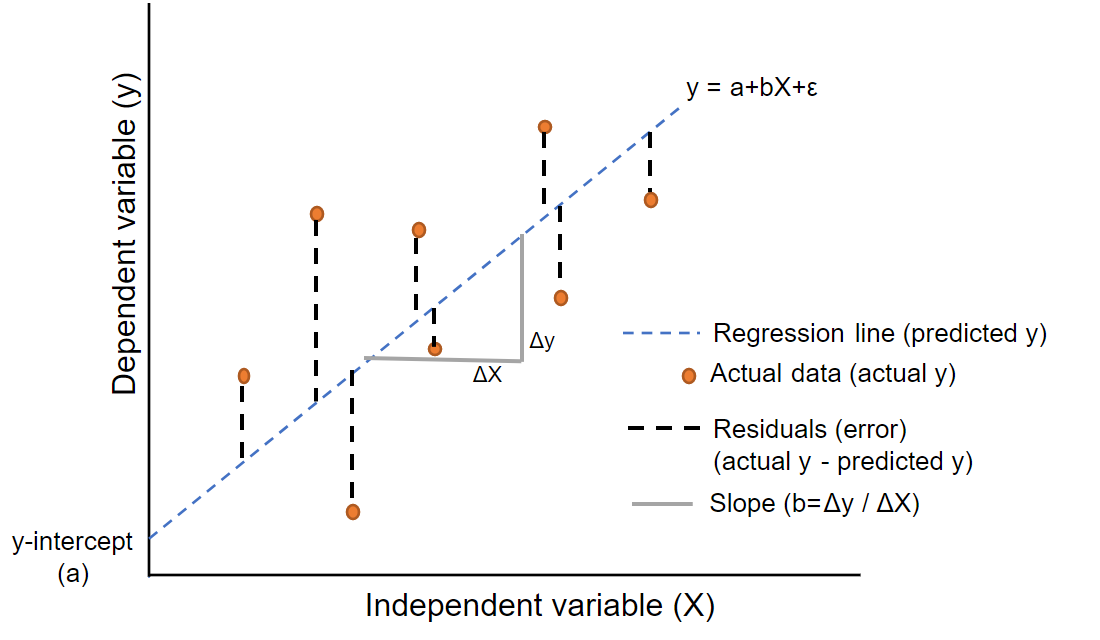

The example aims to introduce the basic concepts and APIs of the library itself, which will be used later.

In [1]:
# !pip install scikit-learn
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
np.random.seed(7)

## Linear Regression with One Variable
We start from the simplest case of univariate linear regression.

### Making a synthetic dataset

<br>
We work with synthetic dataset. The values of the attributes will be divisions of the equidistant grid on the interval [1, 5], and the values of the objective function will be generated by the formula $ y = 11\sin (x) $ with the addition of noise.

`N` is a variable that will represent the size of the data set.

In [3]:
N = 100

Next, we generate values for the `x` attribute and show a dependency graph with the target variable `y`.

In [4]:
# extract equally spaced points from domain [1, 5] X
x = np.linspace(1, 5, N)

# create a matrix by adding a 1 vector
X = np.vstack([np.ones_like(x), x]).T

X.shape

(100, 2)

In [5]:
y = 11 * np.sin(x) + 1.5 * np.random.randn(N)

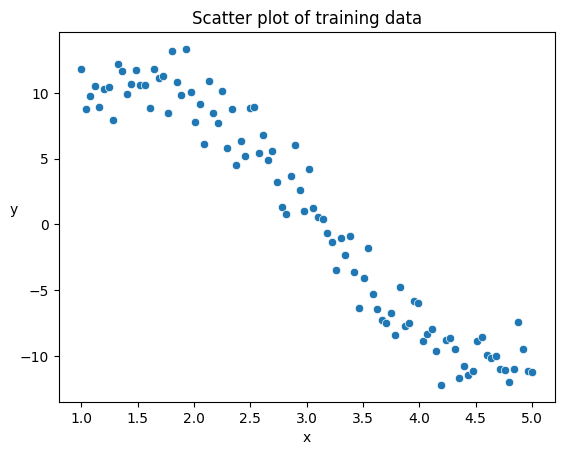

In [6]:
ax = sns.scatterplot(x=x, y=y)
ax.set(xlabel='x', title='Scatter plot of training data')
ax.set_ylabel('y', rotation=0)
plt.show()

### Creating the model

Our hypothesis is:$$h_\textbf{w}(x) = w_0 + w_1x$$
We want to find the best values for the parameters $w_0$ and $w_1$ given our training data.



### Gradient descent
We implement gradient descent ourself to get familiar with the concept.
We want to minimize the Mean Square Error (MSE):

$$ \textit{TrainLoss}(\textbf{w}) = \frac{1}{N} \sum_{i=1}^N (y^{(i)} - h_\textbf{w}(x^{(i)}))^2.$$

Its partial derivatives with respect to the two coefficients are:
$$\frac{\partial}{\partial{w_0}}\textit{TrainLoss}(\textbf{w})=-\frac{2}{N}\sum_{i=1}^Ny^{(i)}-h_{\textbf{w}}(x^{(i)}), \quad
\frac{\partial}{\partial{w_1}}\textit{TrainLoss}(\textbf{w})=-\frac{2}{N}\sum_{i=1}^N(y^{(i)}-h_{\textbf{w}}(x^{(i)}))x^{(i)}.$$


We use the batch gradient descent algorithm. In batch gradient descent, each iteration simultaneously updates $w_j$ for all $j$:

$$ w_0:= w_0 + \alpha \frac{1}{N} \sum_{i=1}^N y^{(i)} - h_\textbf{w}(x^{(i)}), \quad
 w_1 := w_1 + \alpha \frac{1}{N} \sum_{i=1}^N (y^{(i)} - h_\textbf{w}(x^{(i)}))x^{(i)}.$$ 
 
Note that the factor of two has been absorbed into $\alpha$.

With each step of gradient descent, your parameters $w_j$ come closer to the optimal values that will achieve the lowest cost $\textit{TrainLoss}(\textbf{w})$.

In [7]:
iterations = 2000
alpha = 0.02
w = np.zeros((X.shape[1], 1))

Y = y.reshape(-1,1)

#### Exercise: Implement Gradient Descent for MSE

Implement the function `batch_gradient_descent_mse_update` that updates the weight vector $\textbf{w}$ following the gradient descent procedure for univariate linear regression using the Mean Squared Error (MSE) loss, as described above.

The function takes the following arguments:
- `X`: A 2D array with dimensions $(N, 2)$, where the first column contains all ones, and the second column represents the $x$-coordinates of the training data.
- `Y`: A 2D array with dimensions $(N, 1)$, containing the target variable $y$ of the training data.
- `w`: A 2D array with dimensions $(2, 1)$, containing the weights $w_0$ and $w_1$, respectively.
- `alpha`: A scalar representing the learning rate $\alpha$.

Implement the following steps:
1. Compute the predictions $h_\textbf{w}(x) = w_0 + w_1 x$. Use the [`numpy.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method for this.
2. Compute the difference between the true target variables and the predictions.
3. Compute the partial derivatives with respect to $w_0$ and $w_1$ (ignore the factor of 2, as it is included in the $\alpha$ parameter).
4. Update the weights $w_0$ and $w_1$ using $\alpha$ and the partial derivatives.


In [8]:
def batch_gradient_descent_mse_update(X, Y, w, alpha):
    N = Y.shape[0]
    h = X.dot(w)
    diff_yh = Y - h
    delta = (1/N) * (diff_yh.T.dot(X))
    w = w + (alpha * delta.T)
    return w

In [9]:
w_hist = []
# batch gradient descent
for _ in range(iterations):
    w = batch_gradient_descent_mse_update(X, Y, w, alpha)
    w_hist.append(w)

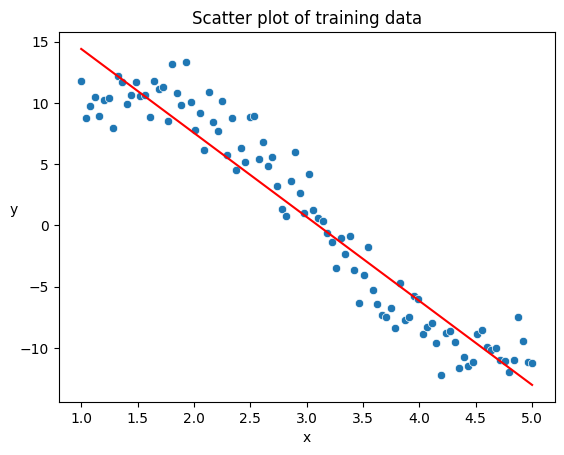

In [10]:
ax = sns.scatterplot(x=x, y=y)
plt.plot(x, X.dot(w), color='r')
ax.set(xlabel='x', title='Scatter plot of training data')
ax.set_ylabel('y', rotation=0)
plt.show()

### Visualizing the cost function
We vizualize the cost function $\textit{TrainLoss}(\textbf{w})$ as a function of the two weights.


In [11]:
# create a grid around the final values
w0_final = w[0].item()
w1_final = w[1].item()
w0_range = np.arange(-1 + w0_final, 1 + w0_final, 0.01)
w1_range = np.arange(-1 + w1_final, 1 + w1_final, 0.01)
w0_values, w1_values = np.meshgrid(w0_range, w1_range)
h_values = np.tensordot(x, w1_values, axes = 0) + w0_values[None, :]

# compute square error
L = np.mean((Y.reshape(-1, 1, 1) - h_values) ** 2, 0)

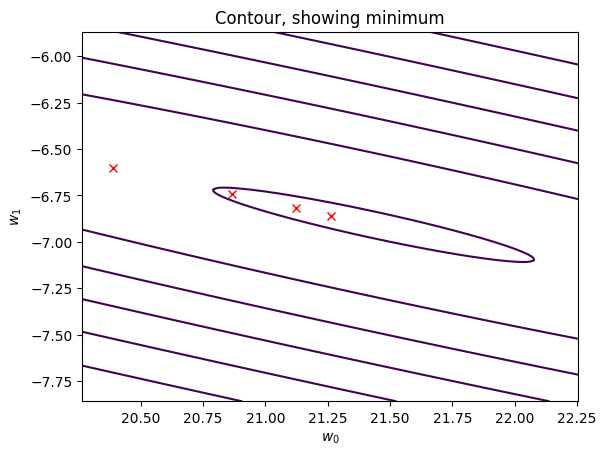

In [12]:
ax = plt.contour(w0_values, w1_values, L, levels=np.logspace(-5,5,100))
for iter in (1249, 1499, 1749, 1999):
    w0, w1 = w_hist[iter]
    plt.plot(w0, w1, marker='x', color='r');
plt.xlabel(r'$w_0$', rotation=0);
plt.ylabel(r'$w_1$');
plt.title('Contour, showing minimum');

## scikit-learn implementation

[scikit-learn](https://scikit-learn.org/) is a Python library specifically for machine learning tasks. `linear_model` is a module that provides methods for working with linear models such as linear regression, linear regression with regularizations, logistic regression and others. `model_selection` is a module that has functionalities such as dividing a data set into training and testing sets, cross-validation, and others. The `metrics` module provides various metrics that can be used in evaluation.


The `train_test_split` method divides a dataset into training and test datasets. The ratio of these sets is determined by the parameters `train_size` or` test_size`. These parameters are expressed by values from 0 to 1 and represent the percentage of the specified set. For example, assigning `test_size = 0.2` indicates that 20% of the data will be used for testing and 80% for training. As this division into training and testing sets is random, the `random_state` parameter can be used to control the division. This type of control is critical for the reproduction of experiments.

#### Exercise: Perform the train-test split

Use a train-test split of size 3 : 2. Set the `random_state` to 7.

In [13]:
# remove the 1 vector from the matrix
X_sklearn = X[:, 1:2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_sklearn, 
    y, 
    test_size=0.4, 
    random_state=7
)

We use the `LinearRegression` method to create a linear regression model. By default, the free term $w_0 $ is associated with the model. If it is necessary to omit it, the parameter `fit_intercept` of the constructor function can be set to `False`.

In [14]:
model = linear_model.LinearRegression()

The `fit` function is used to train the model. Training is done over a training set.

In [15]:
model.fit(X_train, y_train)

LinearRegression()

After training, we can read the model coefficients and the free member's value via the parameters `coef_` and` intercept_`.

In [16]:
type(model.coef_)

numpy.ndarray

In [17]:
model.coef_.shape

(1,)

In [18]:
w1 = model.coef_[0]
print(w1)

-6.8883823194838225


In [19]:
type(model.intercept_)

numpy.float64

In [20]:
model.intercept_.shape

()

In [21]:
w0 = model.intercept_
print(w0)

21.095231913780015


We draw a graph of the model obtained in this way.

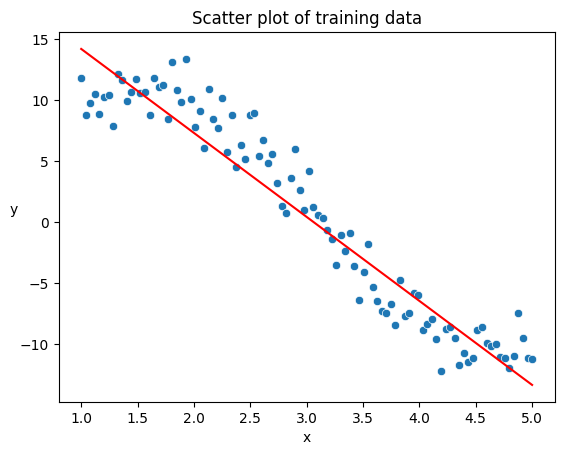

In [22]:
ax = sns.scatterplot(x=x, y=y)
plt.plot(x,  w0 + x * w1, color='r')
ax.set(xlabel='x', title='Scatter plot of training data')
ax.set_ylabel('y', rotation=0)
plt.show()

We show where the best parameters found by sklearn are in the previous countour plot. 

Why is it not in the minimum?

**Answer:** Because the model was not trained on the entire dataset, but only on the training set.

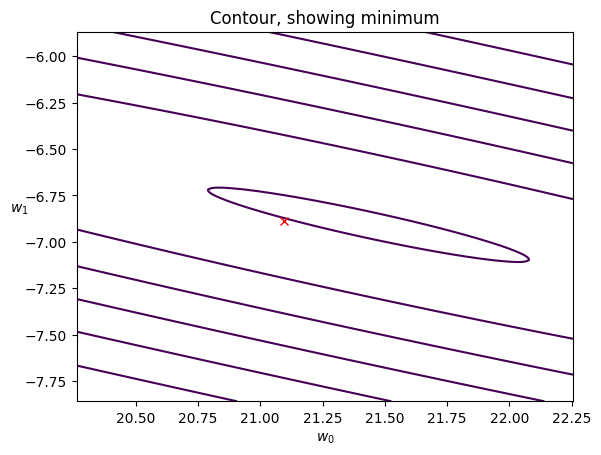

In [23]:
ax = plt.contour(w0_values, w1_values, L, levels=np.logspace(-5,5,100))
plt.plot(w0, w1, marker='x', color='r');
plt.xlabel(r'$w_0$');
plt.ylabel(r'$w_1$', rotation=0);
plt.title('Contour, showing minimum');

### Predicting values by using the learned model

The `predict` function can be used to predict the value of the target variable over new instances. For individual predictions, its argument should be in the form of a matrix.

In [24]:
model.predict(np.array([[23]])).item()

-137.3375614343479

### Model evaluation

To evaluate regression models, we can use the coefficient of determination, the standard error, or the mean absolute error. The root mean square and the mean absolute error are expressed in terms of the unit size of the target variable, while the value of the coefficient of determination is normalized. To compute each value, we need the target variable and the model prediction for the same set of instances.

#### Coefficient of determination $R^2$
    
$$R^2 = 1 - \frac{\sum_i{(y^{(i)}-\hat{y}^{(i)})^2}}{\sum_i{(y^{(i)} - \bar{y})^2}}$$

The values of the coefficient of determination are from the interval ${(-\infty, 1]}$ and the values closer to $1$ denote the "better" models.

In [25]:
def r_squared(y_true, y_predicted):
    u = ((y_true - y_predicted)**2).sum()
    
    y_mean = y_true.mean(); 
    v = ((y_true - y_mean)**2).sum()
    
    return 1 - u/v

#### Root mean squared error $RMSE$: 
    
$$MSE = \sqrt{\frac{1}{n} \sum_i{(y^{(i)}-\hat{y}^{(i)})^2}}$$

In [26]:
def root_mean_squared_error(y_true, y_predicted):
    return np.sqrt(((y_true - y_predicted)**2).mean());

#### Mean absolute error $MAE$: 
    
$$MAE = \frac{1}{n} \sum_i{|y^{(i)}-\hat{y}^{(i)}|}$$

In [27]:
def mean_absolute_error(y_true, y_predicted):
    return abs(y_true - y_predicted).mean();

We will generate predictions of the training set model.

In [28]:
y_predicted = model.predict(X_test)

In [29]:
r_squared(y_test, y_predicted)

np.float64(0.9180067851070282)

In [30]:
root_mean_squared_error(y_test, y_predicted)

np.float64(2.3200063091920735)

In [31]:
mean_absolute_error(y_test, y_predicted)

np.float64(1.873704023206755)

Equivalents of these functions, with some additional settings, are also available through the `metrics` package. The mean square error is calculated by the `mean_squared_error` function, and the coefficient of determination by the` r2_score` function.

In [32]:
r2 = metrics.r2_score(y_test, y_predicted)
r2

0.9180067851070282

Another function that can calculate the value of the coefficient of determination is the `score` method of the model itself.

In [33]:
model.score(X_test, y_test)

0.9180067851070282

In [34]:
mse = metrics.mean_squared_error(y_test, y_predicted)
np.sqrt(mse)

np.float64(2.3200063091920735)

In [35]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
mae

np.float64(1.873704023206755)